<a href="https://colab.research.google.com/github/morenoloza98/Notebooks/blob/master/Entrega_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC2010.500 (Intelligent Systems)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<h4>Names:</h4>
<p>Kevin A. Ruvalcaba Perez</p>
<p>Santiago Gutiérrez Bárcenas</p>
<p>Alejandro Moreno Loza</p>
<p>Diego Moreno Rodríguez</p>
<h4>Students ID:</h4>
<p>A01652241</p>
<p>A01652520</p>
<p>A01654319</p>
<p>A01337594</p>
<h4>Github:</h4>
<a href="https://github.com/KevinRuvalcaba/sistemas-inteligentes">Github Kevin</a><br>
<a href="https://github.com/SantiagoGutierrezB/Sistemas_Inteligentes">Github Santiago</a><br>
<a href="https://github.com/morenoloza98/Notebooks">Github Alejandro</a><br>
<a href="https://github.com/DiegoMoreno1110/Sistemas_Inteligentes_">Github Diego</a><br>

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Sistemas Inteligentes</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#d)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Intentar presentar un enfoque completo para modelar problemas, que va desde el análisis exploratorio de datos hasta la aplicación de técnicas de aprendizaje supervisado y no supervisado a nuestros datos.

El contenido de esta notebook está dirigido principalmente para entender mejor las etapas que se realizan en los problemas de Ciencia de Datos y Aprendizaje Máquina (y posiblemente en Aprendizaje Profundo).

**A través de algoritmos poder realizar la clasificación de los Pokemon de primera a cuarta generación de acuerdo a sus atributos, tipo, rareza, entre otros; así como conocer el tipo de Pokemon que se presenta en una imagen
por medio de algoritmos de Aprendizaje Máquina.**

<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

El conjunto de datos contiene los siguientes datos de los Pokemon:
  - Número
  - Nombre
  - Atributos (salud, ataque, defensa, etc)
  - Tipo
  - Rareza
  - Generación
  - Imágen

El orden al momento de importar las librerías es la siguiente:

  **Estas librerías fueron utilizadas para manejar los datos**

  import numpy as np 

  import pandas as pd 

  **Estas librerías se utilizaron para la visualización de los datos por medio de gráficas**

  import matplotlib as mpl

  import matplotlib.pyplot as plt
  
  import seaborn as sns
  
  import plotly
  
  from plotly.subplots import make_subplots
  
  import plotly.graph_objects as go

  **Estas librerías fueron utilizadas para recibir los datos por medio de una petición http y parsearlas a python**

  from bs4 import BeautifulSoup, Comment

  from requests import get

  **Estas librerías fueron utilizadas para poder asociar el tipo de Pokemon con la imagen**

  from keras.models import Sequential
  
  from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
  
  from keras.preprocessing.image import ImageDataGenerator


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go


pokemons = pd.read_csv('./pokemon2.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = './pokemon2/pokemon'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

import re
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')

select = ['Water', 'Fire', 'Poison', 'Electric', 'Grass']
result = result[result['Type1'].isin(select)]
fig = go.Figure()

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[0]],
                     y=[result['Type1'].value_counts()[0]],
                     marker_color='blue',
                     name='water'
                     ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[1]],
                     y=[result['Type1'].value_counts()[1]],
                     marker_color='red',
                     name='fire'
                    ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[2]],
                     y=[result['Type1'].value_counts()[3]],
                     marker_color='purple',
                     name='poison'
                    ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[3]],
                     y=[result['Type1'].value_counts()[3]],
                     marker_color='yellow',
                     name='electric'
                    ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[4]],
                     y=[result['Type1'].value_counts()[4]],
                     marker_color='green',
                     name='grass'
                    ))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Pokemon Distribution',
        'width': 500, 
        'height': 400
})
fig.show()


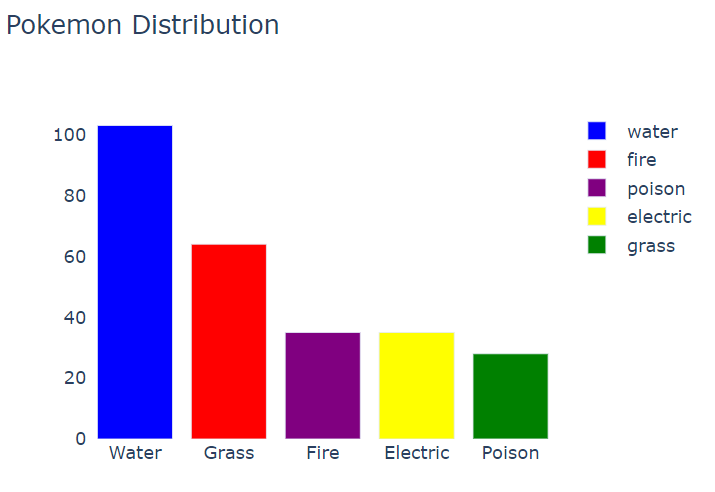

<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación de la metodología de aprendizaje automático. En caso de aplicar un **pipeline** de aprendizaje no supervisado y / o supervisado, que tenga un orden claro y expliquen el porqué de su aplicación con lo que han percibido de sus datos. 

El modelo seleccionado, qué parámetros o hiperparámetros eligieron, el porqué entrenaron con cierto tamaño de muestra y los resultados obtenidos.

**El modelo que se utilizó fue el Secuencial** 

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import plotly.graph_objects as go


pokemons = pd.read_csv('./pokemon2.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = './pokemon2/pokemon'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

import re
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')
print(result.head())
select = ['Water', 'Fire', 'Poison', 'Electric', 'Grass']
result = result[result['Type1'].isin(select)]

In [ ]:
import os
from shutil import copyfile

os.mkdir('train/')
os.mkdir('test/')
os.mkdir('val/')
for class_ in result['Type1'].unique():
    os.mkdir('train/'+str(class_)+'/')
    os.mkdir('test/'+str(class_)+'/')
    os.mkdir('val/'+str(class_)+'/')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size=0.33, stratify=result['Type1'])

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33,stratify=y_test) 


from shutil import copyfile, copy2

for image,type_  in zip(X_train['images'], y_train):
    copy2(image, './train/'+type_)

for image,type_ in zip(X_test['images'], y_test):
    copy2(image, './test/'+type_)
    
for image,type_ in zip(X_val['images'], y_val):
    copy2(image, './val/'+type_)


In [ ]:

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('./train/')
test = datagen.flow_from_directory('./test/')
val = datagen.flow_from_directory('./val/')



model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)
model.save('pokimans2.h5')

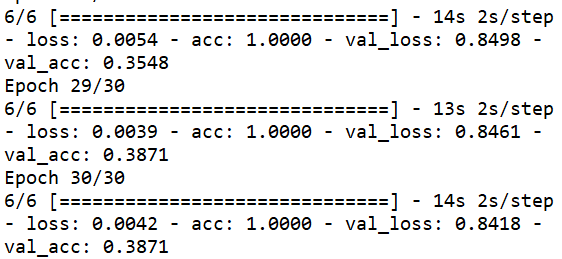

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('./train/')
test = datagen.flow_from_directory('./test/')
val = datagen.flow_from_directory('./val/')


model = build()
model.load_weights('pokimans2.h5')
predict = model.predict_generator(test)
print(predict)


predict = model.predict_generator(test)

from sklearn.metrics import classification_report
predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(predict_frame)
print(classification_report(y_test, predict_frame['category']))

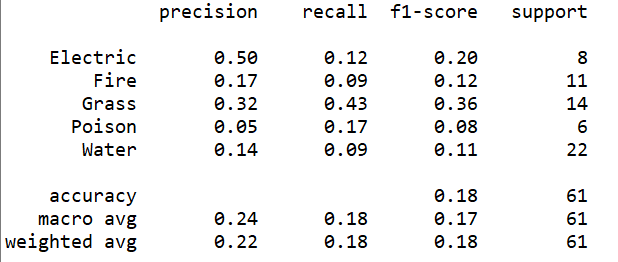



<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

Para la realización de este proyecto, en primera instancia se tuvo que realizar un análisis exploratorio de los datos de los Pokemon de la primera a la cuarta generación.

Posteriormente, se realizó el entrenamiento del modelo, el cuál resultó tener un precisión del 100%. Sin embargo, al momento de hacer pruebas se llegó a la conclusión de que tal vez la estructura y el modelo utilizados no fueron los más adecuados para la correcta realización de este proyecto, por lo que los resultados no funcionaron como se esperaba.

De igual forma, se realizó el análisis y entrenamiento utilizando los colores predominantes en cada una de las imágenes de los Pokémon de cada tiipo, es decir, el color naranja/rojo es predominante para los Pokémon tipo fuego, el azul para los de agua, amarillo para los eléctricos, entre otros. Esto fue útil para aquellos Pokémon que no cuentan con más de un color predominante, por lo que, en los casos contrarios, cuando se hicieron pruebas nos percatamos que el modelo categorizaba de manera errónea a dichos Pokémon.

Por último, consideramos que este tipo de análisis de datos, clasificación de los mismos, entre otras cosas, pueden ser aplicados para diversos contextos en diferentes áreas, un ejemplo claro es la categorización de ciertos productos en el mercado, entre otros.